#punto 1

In [2]:
% pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [3]:
def lagrangep(absc,j):
    pol=np.poly1d([0,1])
    k=len(absc)
    for m in range(k):
        if m!=j:
            pol*=1./(absc[j]-absc[m])*np.poly1d([1.,-absc[m]])
    return pol 

def interlagr(absc,orde):
    poly=np.poly1d([0])
    for i in range(len(absc)):
        poly+=orde[i]*lagrangep(absc,i)
    return poly

x=[0,pi/2.,pi,3.*pi/2.,2*pi]
y=[0,1,0,-1,0]
interpolsin1=interlagr(x,y)

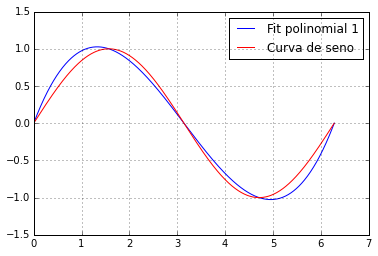

In [4]:
figure()
x=linspace(0,2*pi,1000)
plot(x,interpolsin1(x),label='Fit polinomial 1')

plot(x,sin(x),c ='r',label ='Curva de seno')
legend()
grid()
show()

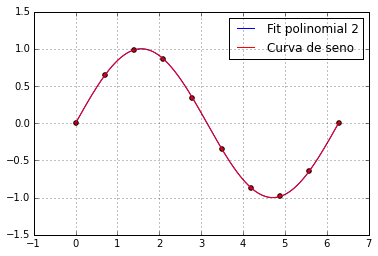

In [5]:
x2=linspace(0,2*pi,10)
y2=sin(x2)
interpolsin2=interlagr(x2,y2)
figure()
x=linspace(0,2*pi,1000)
plot(x,interpolsin2(x),label='Fit polinomial 2')
scatter(x2,y2,c='r')
plot(x,sin(x),c ='r',label ='Curva de seno')
legend()
grid()
show()

In [6]:
from scipy import interpolate

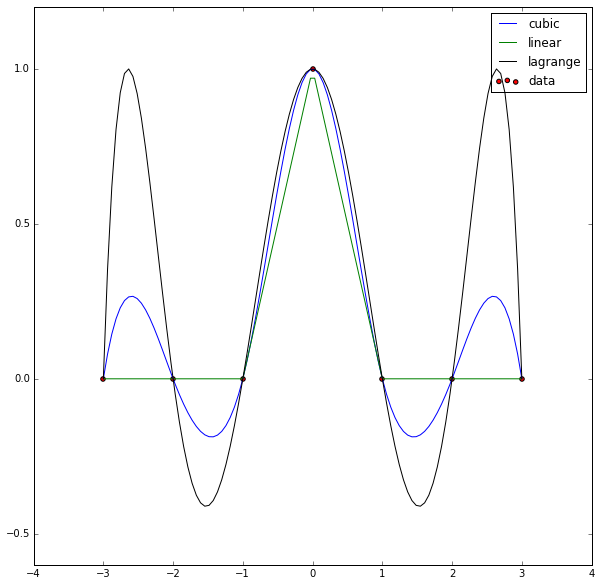

In [7]:
x=[-3,-2,-1,0,1,2,3]
ypulse=[0,0,0,1,0,0,0]
interpol_lin = interpolate.interp1d(x,ypulse,kind='linear')
interpol_cubic = interpolate.interp1d(x,ypulse,kind='cubic')
interpol_lagrange=interlagr(x,ypulse)

figure(figsize(10,10))
scatter(x,ypulse,c='r',label='data')
xlin=linspace(-3,3,100)
plot(xlin,interpol_cubic(xlin),label="cubic")
plot(xlin,interpol_lin(xlin),label="linear")
plot(xlin,interpol_lagrange(xlin),label='lagrange',c='black')
legend()

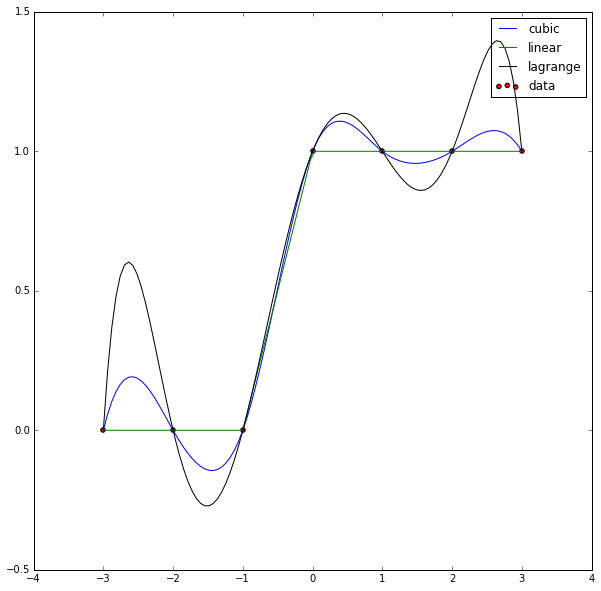

In [8]:
x=[-3,-2,-1,0,1,2,3]
ystep=[0,0,0,1,1,1,1]
interpol_lin = interpolate.interp1d(x,ystep,kind='linear')
interpol_cubic = interpolate.interp1d(x,ystep,kind='cubic')
interpol_lagrange=interlagr(x,ystep)

figure(figsize(10,10))
scatter(x,ystep,c='r',label='data')
xlin=linspace(-3,3,100)
plot(xlin,interpol_cubic(xlin),label="cubic")
plot(xlin,interpol_lin(xlin),label="linear")
plot(xlin,interpol_lagrange(xlin),label='lagrange',c='black')
legend()

#Punto 2
Lectura

#Punto 3

In [12]:
filename=genfromtxt("./datos.tsv",delimiter="\t")
interpol_cubic=interpolate.interp1d(filename[:,0],filename[:,1],kind='cubic')

print (len(filename))

24


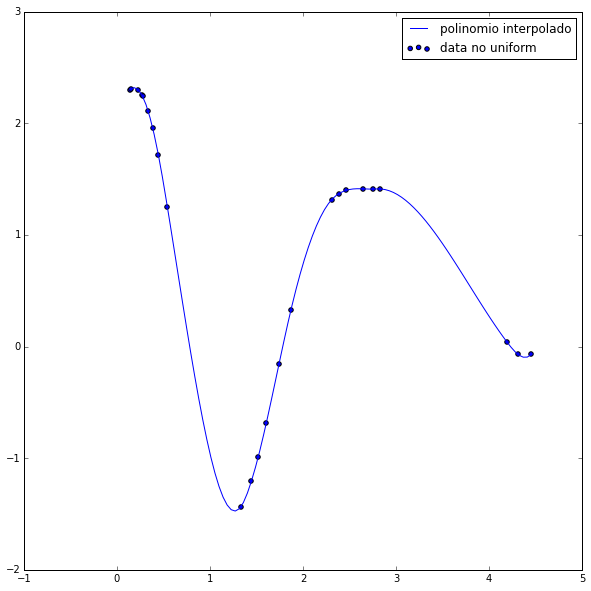

In [17]:
figure(figsize(10,10))
scatter(filename[:,0],filename[:,1],c='b',label='data no uniform')
xlin=linspace(filename[0,0],filename[23,0],100)
plot(xlin,interpol_cubic(xlin),label="polinomio interpolado")
legend()
show()


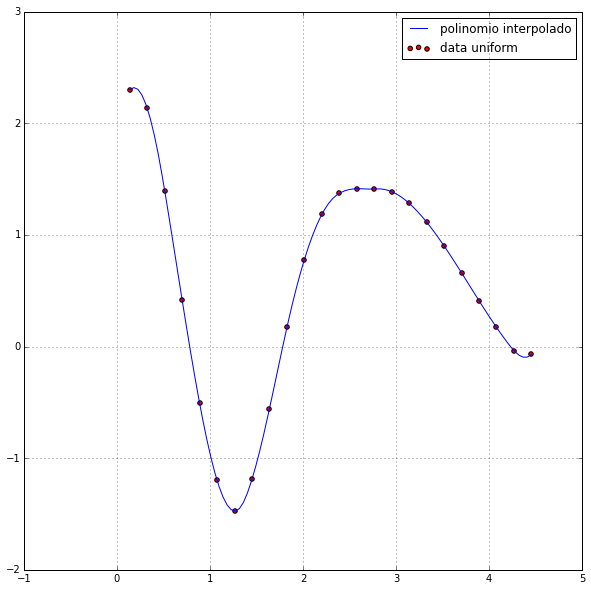

[ 0.13849067  0.32622665  0.51396263  0.7016986   0.88943458  1.07717056
  1.26490654  1.45264252  1.64037849  1.82811447  2.01585045  2.20358643
  2.39132241  2.57905838  2.76679436  2.95453034  3.14226632  3.3300023
  3.51773827  3.70547425  3.89321023  4.08094621  4.26868219  4.45641816]


In [22]:
xuniform=linspace(filename[0,0],filename[23,0],24)
yuniform=interpol_cubic(xuniform)
figure(figsize(10,10))
scatter(xuniform,yuniform,c='r',label='data uniform')
xlin=linspace(filename[0,0],filename[23,0],100)
plot(xlin,interpol_cubic(xlin),label="polinomio interpolado")
grid()
legend()
show()
print (xuniform)

In [26]:
outfile = open('datosUniformes.csv', 'w') 
for i in range(len(xuniform)):
    outfile.write("%.9f,%.9f\n"%(xuniform[i],yuniform[i]))
outfile.close()

In [27]:
datosU=genfromtxt("./datosUniformes.csv",delimiter=",")
print(datosU)

[[ 0.13849067  2.30060162]
 [ 0.32622665  2.13557984]
 [ 0.51396263  1.39719882]
 [ 0.7016986   0.41720659]
 [ 0.88943458 -0.50819955]
 [ 1.07717056 -1.19852808]
 [ 1.26490654 -1.47360828]
 [ 1.45264251 -1.1883362 ]
 [ 1.64037849 -0.55652504]
 [ 1.82811447  0.17121876]
 [ 2.01585045  0.77986546]
 [ 2.20358643  1.18452422]
 [ 2.3913224   1.37314209]
 [ 2.57905838  1.41448149]
 [ 2.76679436  1.41176113]
 [ 2.95453034  1.38826706]
 [ 3.14226632  1.28426676]
 [ 3.33000229  1.11616042]
 [ 3.51773827  0.90246882]
 [ 3.70547425  0.66171278]
 [ 3.89321023  0.41241307]
 [ 4.08094621  0.17309051]
 [ 4.26868219 -0.03495011]
 [ 4.45641816 -0.07040876]]
